## **MODULE 2 : CASE STUDY KIVA**
---

In [2]:
# import library
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

Deskripsi kolom: 
Berikut adalah deskripsi dari masing-masing kolom:
- `id`: Unique ID untuk masing-masing loan (loan ID)
- `funded_amount`: Jumlah yang dicairkan oleh Kiva ke agen (USD)
- `loan_amount`: Jumlah yang disalurkan oleh agen ke peminjam (USD)
	Keterangan tambahan:
    - loan_amount adalah jumlah dana yang dibutuhkan oleh borrower (peminjam).
    - funded_amount biasanya sama atau lebih kecil dari loan_amount:


Sama: Jika seluruh jumlah yang dibutuhkan berhasil terkumpul.
Lebih kecil: Jika belum seluruhnya terkumpul, tetapi Kiva memutuskan tetap mendistribusikan sebagian yang sudah terkumpul.

- `activity`: Kategori lebih spesifik dari `sector`
- `sector`: Kategori dari loan
- `country`: Nama negara lengkap, tempat pinjaman dicairkan
- `region`: Nama wilayah lengkap dari `country`
- `currency`: Mata uang
- `partner_id`: ID untuk organisasi partner
- `posted_time`: Waktu pinjaman di-posting di Kiva oleh agen
- `funded_time`: Waktu pinjaman telah sepenuhnya dibiayai oleh pemberi pinjaman
- `term_in_months`: Durasi pencairan pinjaman (dalam satuan bulan)
- `lender_count`: Banyaknya peminjam yang berkontribusi
- `repayment_interval`: Cara pelunasan peminjaman

Latar Belakang Masalah

Industri tekstil memiliki peran penting dalam perekonomian, terutama dalam skala home industry yang berkontribusi dalam menciptakan lapangan kerja dan meningkatkan kesejahteraan masyarakat. Namun, salah satu tantangan utama bagi pelaku home industry adalah akses terhadap pendanaan untuk pengembangan usaha mereka. Platform seperti Kiva menyediakan solusi dengan menawarkan sistem pinjaman mikro bagi pelaku usaha kecil di berbagai sektor, termasuk industri tekstil.

Sebagai pemilik perusahaan tekstil, penting untuk mengidentifikasi home industry yang berpotensi menjadi mitra bisnis. Dengan menganalisis data dari platform Kiva, kita dapat melihat tren pendanaan yang telah diberikan kepada sektor terkait, memahami karakteristik peminjam, serta menilai seberapa besar peluang kerja sama dengan mereka.

Oleh karena itu, penelitian ini bertujuan untuk mengeksplorasi tren pinjaman dalam industri tekstil menggunakan data dari Kiva. Analisis statistik akan digunakan untuk menilai aspek-aspek seperti jumlah pendanaan, negara asal peminjam, aktivitas usaha, dan pola pembayaran. Dengan demikian, kita dapat menentukan pelaku home industry yang memiliki prospek terbaik untuk dijadikan mitra bisnis dalam industri tekstil.

In [3]:
df = pd.read_csv('kiva_loan.csv')
df.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly


DATA UNDERSTANDING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

In [5]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [6]:
df['activity'].unique()

array(['Fruits & Vegetables', 'Rickshaw', 'Transportation', 'Embroidery',
       'Milk Sales', 'Services', 'Dairy', 'Beauty Salon', 'Manufacturing',
       'Food Production/Sales', 'Wholesale', 'General Store',
       'Clothing Sales', 'Poultry', 'Tailoring', 'Sewing', 'Bakery',
       'Restaurant', 'Food Stall', 'Farming', 'Construction Supplies',
       'Personal Products Sales', 'Home Products Sales',
       'Natural Medicines', 'Fish Selling', 'Education provider',
       'Shoe Sales', 'Machinery Rental', 'Butcher Shop', 'Pigs',
       'Personal Expenses', 'Food Market', 'Cosmetics Sales',
       'Personal Housing Expenses', 'Retail', 'Energy', 'Grocery Store',
       'Construction', 'Agriculture', 'Motorcycle Transport',
       'Charcoal Sales', 'Food', 'Pharmacy', 'Fishing', 'Timber Sales',
       'Cattle', 'Electronics Repair', 'Electronics Sales', 'Vehicle',
       'Cafe', 'Blacksmith', 'Higher education costs', 'Used Clothing',
       'Fuel/Firewood', 'Upholstery', 'Catering',

## **DATA WRAGLING**

In [7]:
df.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
funded_time           48331
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [8]:
df["partner_id"].fillna("Tanpa ID", inplace=True)
df["region"].fillna("-", inplace=True)
df["funded_time"].fillna("-", inplace=True)
df['use'].fillna('-', inplace=True)

In [9]:
df.isna().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country               0
region                0
currency              0
partner_id            0
posted_time           0
funded_time           0
term_in_months        0
lender_count          0
repayment_interval    0
dtype: int64

In [10]:
df_activity = df[(df['activity'].isin(['Weaving', 'Cloth & Dressmaking Supplies', 'Clothing', 'Clothing Sales'])) & 
                (df['country'] == 'India')]

df_activity.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
1049,654177,2100.0,2100.0,Weaving,Arts,To purchase more yarn and threads,India,Imphal East,INR,238.0,2014-01-06 11:40:54+00:00,2014-01-13 20:07:40+00:00,43.0,70,bullet
1800,654758,1775.0,1775.0,Weaving,Arts,"To purchase different types of yarn, thread an...",India,Imphal East,INR,238.0,2014-01-07 14:07:36+00:00,2014-01-08 22:29:06+00:00,43.0,55,bullet
2185,655190,1950.0,1950.0,Weaving,Arts,"To purchase threads, yarns, other tools for we...",India,Saikul,INR,238.0,2014-01-08 11:01:23+00:00,2014-01-10 06:45:03+00:00,43.0,69,bullet


Penjelasan:
- df['activity'].isin([...])

- Fungsi isin() digunakan untuk memeriksa apakah nilai dalam kolom 'activity' termasuk dalam daftar yang diberikan (['Weaving', 'Knitting', 'Clothing', 'Clothing Sales']).

In [11]:
df_activity['repayment_interval'].value_counts()

repayment_interval
monthly      664
bullet       297
irregular      1
Name: count, dtype: int64

In [12]:
df_activity['funded_amount'].value_counts()

funded_amount
300.0     126
325.0     116
400.0      80
225.0      80
250.0      69
         ... 
750.0       1
4125.0      1
3875.0      1
975.0       1
500.0       1
Name: count, Length: 107, dtype: int64

In [13]:
df_activity['activity'].value_counts()

activity
Clothing Sales                  491
Weaving                         432
Clothing                         28
Cloth & Dressmaking Supplies     11
Name: count, dtype: int64

## **Exploratory Data Analysis (EDA)**

**A. Analisis Pola Repayment Interval Berdasarkan Term in Months**

Tujuan:
1. Mengidentifikasi pola pinjaman dengan repayment interval di sektor Weaving, Clothing dll di India.
2. Menganalisis durasi pinjaman (term in months) dan karakteristik lender yang mendukung pinjaman tersebut.
3. Menilai hubungan antara jumlah pendanaan yang diberikan dengan sektor usaha terkait.
4. Memahami kecepatan pendanaan dan faktor yang memengaruhi pola pembayaran pinjaman di sektor tertentu.

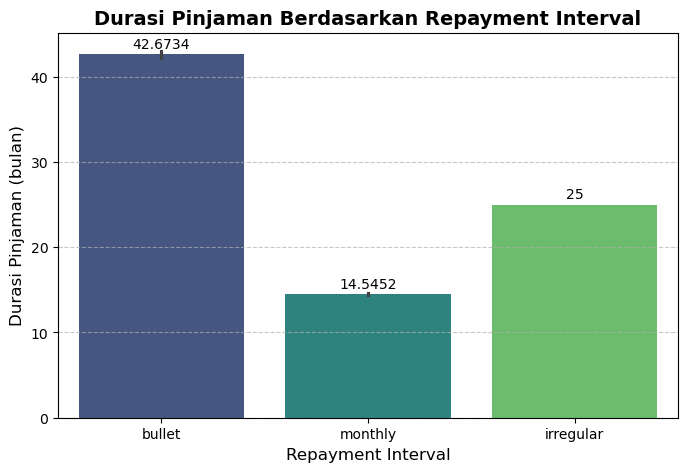

In [14]:
plt.figure(figsize=(8, 5))
fig = sns.barplot(df_activity, x='repayment_interval', y='term_in_months', palette="viridis")
plt.title("Durasi Pinjaman Berdasarkan Repayment Interval")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Repayment Interval", fontsize=12)
plt.ylabel("Durasi Pinjaman (bulan)", fontsize=12)
plt.title("Durasi Pinjaman Berdasarkan Repayment Interval", fontsize=14, fontweight="bold")

for container in fig.containers:
    fig.bar_label(container,padding = 2)
plt.show()


Insight:

Durasi Pinjaman Berdasarkan Repayment Interval
- Skema pembayaran Bullet memiliki durasi pinjaman terpanjang (rata-rata sekitar 42.67 bulan), yang mungkin menunjukkan bahwa model ini digunakan untuk pinjaman jangka panjang.
- Skema pembayaran Monthly memiliki durasi pinjaman terpendek (rata-rata sekitar 14.54 bulan), menunjukkan bahwa pembayaran bulanan cenderung digunakan untuk pinjaman jangka pendek.
- Skema pembayaran Irregular memiliki durasi pinjaman rata-rata 25 bulan, yang berada di antara kedua model lainnya.

## **Hypotesis Testing**

In [15]:
from scipy.stats import shapiro

bullet = df[df['repayment_interval'] == 'bullet']['term_in_months']
monthly = df[df['repayment_interval'] == 'monthly']['term_in_months']
irregular = df[df['repayment_interval'] == 'irregular']['term_in_months']

stat_bul, p_bul = shapiro(bullet)
stat_mon, p_mon = shapiro(monthly)
stat_reg, p_reg = shapiro(irregular)

print(f"p-value Bullet: {p_bul:}, p-value Monthly: {p_mon:}, p-value Irregular: {p_reg:}")

p-value Bullet: 1.6718184172048239e-130, p-value Monthly: 7.608720195474957e-164, p-value Irregular: 2.739323284486414e-188


In [16]:
alpha = 0.05
if p_bul > alpha:
    print("Distribusi Bullet: Normal (Fail to Reject H0)")
else:
    print("Distribusi Bullet: Tidak Normal (Reject H0)")

if p_mon > alpha:
    print("Distribusi Monthly: Normal (Fail to Reject H0)")
else:
    print("Distribusi Monthly: Tidak Normal (Reject H0)")
if p_reg > alpha:
    print("Distribusi Irregular: Normal (Fail to Reject H0)")
else:
    print("Distribusi Irregular: Tidak Normal (Reject H0)")

Distribusi Bullet: Tidak Normal (Reject H0)
Distribusi Monthly: Tidak Normal (Reject H0)
Distribusi Irregular: Tidak Normal (Reject H0)


Insight :
- Setelah dilakukan Cek Distribusi Data, maka didapati bahwa data p-value dari repayment inteval `Bullet` dan `Monthly` tidak terdistribusi normal

In [17]:
from scipy.stats import f_oneway

stat, p_value = f_oneway(bullet, monthly, irregular)
print(f'P-value: {p_value}')


P-value: 0.0


In [18]:
alpha = 0.05
if p_value > alpha:
    print("Data berdistribusi normal (gagal tolak H0)")
else:
    print("Data tidak berdistribusi normal (tolak H0)")

Data tidak berdistribusi normal (tolak H0)


Setelah dilakukan Cek Distribusi Data, maka didapati bahwa data p-value dari repayment inteval `Bullet`, `Monthly`, `Irregular` yang ada pada DataFrame `df_activity` tidak terdistribusi normal

---

**B. Analisis funded amount dan loan amount berdasarkan term in month**

Tujuan:
1. Membandingkan jumlah pendanaan yang diberikan (funded_amount) dengan jumlah pinjaman yang diminta (loan_amount).
2. Untuk mengetahui apakah terdapat kesenjangan antara jumlah yang diajukan dan jumlah yang didanai.
    - Menilai apakah sebagian besar pinjaman didanai sepenuhnya atau hanya sebagian.
    - Menganalisis perbedaan signifikan dalam durasi pinjaman (term_in_months).
3. Memahami pola distribusi durasi pinjaman.
    - Mengidentifikasi apakah ada perbedaan besar antara pinjaman jangka pendek dan jangka panjang.

In [19]:
df_activity[['funded_amount', 'loan_amount', 'term_in_months']].describe()

,funded_amount,loan_amount,term_in_months
count,962.000000,962.000000,962.000000
mean,593.191268,611.330561,23.240125
std,694.355609,717.409489,13.224608
min,100.000000,100.000000,3.000000
25%,250.000000,250.000000,14.000000
50%,325.000000,325.000000,15.000000
75%,475.000000,475.000000,43.000000
max,4475.000000,4475.000000,44.000000


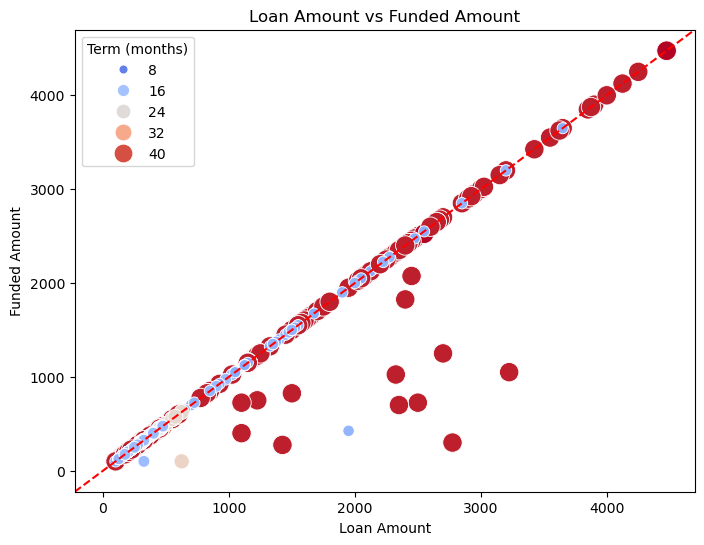

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_activity, x='loan_amount', y='funded_amount', hue='term_in_months', palette='coolwarm', size='term_in_months', sizes=(20, 200))
plt.axline((0, 0), slope=1, color='red', linestyle='dashed', linewidth=1.5)
plt.title("Loan Amount vs Funded Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Funded Amount")
plt.legend(title="Term (months)")

plt.show()

- Jika banyak titik berada di atas garis merah, berarti `funded amount` lebih besar dari `loan amount` yang diminta.
- Jika banyak titik di bawah garis merah, berarti `funded amount` tidak mencapai jumlah `loan amount` yang diminta.

Insight : 
Loan Amount vs. Funded Amount

- Mayoritas pinjaman memiliki nilai Loan Amount yang hampir sama dengan Funded Amount, yang menunjukkan bahwa pengajuan pinjaman umumnya didanai sepenuhnya.
- Beberapa titik di bawah garis diagonal mengindikasikan bahwa ada pinjaman yang tidak sepenuhnya didanai.
- Pinjaman dengan tenor lebih panjang (40 bulan) cenderung memiliki jumlah pinjaman lebih besar dibandingkan tenor yang lebih pendek.

## **Hypotesis Testing**

In [21]:
from scipy.stats import shapiro

stat_loan, p_loan = shapiro(df_activity['loan_amount'])
stat_funded, p_funded = shapiro(df_activity['funded_amount'])

print(f"P-Value Loan Amount: {p_loan}")
print(f"P-Value Funded Amount: {p_funded}")

if p_loan > 0.05:
    print("Kedua variabel berdistribusi normal.")
else:
    print("Salah satu variabel tidak normal.")
    
if p_funded > 0.05:
    print("Kedua variabel berdistribusi normal.")
else:
    print("Salah satu variabel tidak normal.")

P-Value Loan Amount: 6.751093632584675e-42
P-Value Funded Amount: 3.477519368508482e-42
Salah satu variabel tidak normal.
Salah satu variabel tidak normal.


In [22]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df_activity['loan_amount'], df_activity['funded_amount'])

print(f"Korelasi: {corr}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Terdapat hubungan yang signifikan antara loan_amount dan funded_amount.")
else:
    print("Tidak terdapat hubungan yang signifikan antara loan_amount dan funded_amount.")


Korelasi: 0.973415305233122
P-Value: 0.0
Tidak terdapat hubungan yang signifikan antara loan_amount dan funded_amount.


In [23]:
from scipy.stats import spearmanr

corr2, p_value2 = spearmanr(df_activity['loan_amount'], df_activity['funded_amount'])
print(f'korelasi: {corr2}')
print(f'P-Value: {p_value2}')

alpha = 0.05
if p_value > alpha:
    print("Terdapat hubungan yang signifikan antara loan_amount dan funded_amount.")
else:
    print("Tidak terdapat hubungan yang signifikan antara loan_amount dan funded_amount.")


korelasi: 0.9890664641889912
P-Value: 0.0
Tidak terdapat hubungan yang signifikan antara loan_amount dan funded_amount.


**C. Hubungan Aktivitas dengan Funded Amount**

1. Memahami Pola Pendanaan Berdasarkan Aktivitas dan Sektor
    - Analisis bertujuan untuk melihat bagaimana dana yang diberikan (funded amount) didistribusikan di berbagai aktivitas usaha (seperti weaving, clothing sales, dll.) serta sektor ekonomi (Arts, Clothing, Retail). Dengan memahami pola ini, kita dapat mengidentifikasi sektor atau aktivitas yang lebih banyak menerima pendanaan.
2. Mengidentifikasi Sektor yang Mendapatkan Pendanaan Terbesar
    - Mengidentifikasi sektor yang dominan dalam menerima pendanaan.
    - Mengetahui apakah ada kesenjangan pendanaan antar sektor yang perlu diperhatikan.
3. Menganalisis Distribusi Pendanaan di Setiap Aktivitas
    - Apakah ada aktivitas tertentu yang mendapatkan pendanaan lebih besar dibandingkan aktivitas lain.
    - Variasi dalam jumlah pendanaan yang diberikan untuk setiap aktivitas.

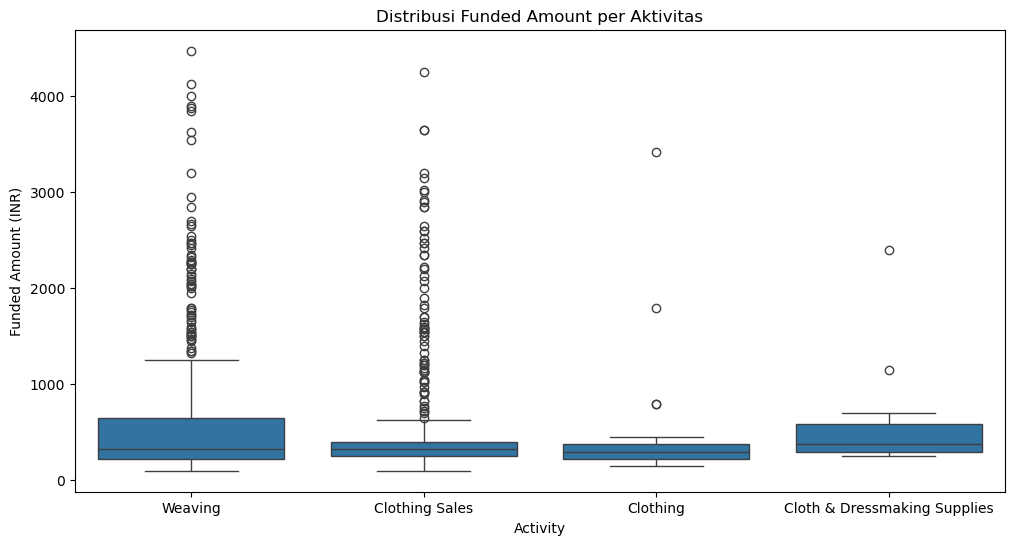

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(df_activity, x='activity', y='funded_amount')
plt.xticks(rotation=360)
plt.title("Distribusi Funded Amount per Aktivitas")
plt.xlabel("Activity")
plt.ylabel("Funded Amount (INR)")
plt.show()


Insight :
- Grafik ini menunjukkan distribusi jumlah pendanaan untuk berbagai aktivitas dalam bentuk boxplot.
- Aktivitas "Weaving" memiliki pendanaan yang jauh lebih bervariasi dibandingkan aktivitas lainnya, dengan banyak outlier di kisaran 2000-4000 INR.
- Aktivitas seperti "Clothing Sales" dan "Clothing" memiliki pendanaan yang lebih stabil, dengan median yang lebih rendah dan sedikit outlier.
- Distribusi ini menunjukkan bahwa beberapa sektor memiliki peluang lebih tinggi untuk mendapatkan pendanaan yang besar.

## **Hypotesis Testing**

In [25]:
from scipy.stats import kruskal

activities = df_activity['activity'].unique()
for activity in activities:
    stat, p_value = shapiro(df_activity[df_activity['activity'] == activity]['funded_amount'])
    print(f'Normalitas {activity}: p-value = {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Data berdistribusi normal (gagal tolak H0)")
else:
    print("Data tidak berdistribusi normal (tolak H0)")

Normalitas Weaving: p-value = 2.994597699467014e-28
Normalitas Clothing Sales: p-value = 1.0296784460741867e-33
Normalitas Clothing: p-value = 5.338168441007765e-09
Normalitas Cloth & Dressmaking Supplies: p-value = 5.950806274012296e-05
Data tidak berdistribusi normal (tolak H0)


In [26]:
stat, p_kruskal = kruskal(
    df_activity[df_activity['activity'] == 'Weaving']['funded_amount'],
    df_activity[df_activity['activity'] == 'Clothing Sales']['funded_amount'],
    df_activity[df_activity['activity'] == 'Clothing']['funded_amount'],
    df_activity[df_activity['activity'] == 'Cloth & Dressmaking Supplies']['funded_amount']
)
print(f'Kruskal-Wallis test: p-value = {p_kruskal}')

alpha = 0.05
if p_value > alpha:
    print('Menolak H0, ada perbedaan signifikan dalam jumlah pendanaan antar aktivitas.')
else:
    print('Gagal menolak H0, tidak ada perbedaan signifikan dalam jumlah pendanaan antar aktivitas.')

Kruskal-Wallis test: p-value = 0.2310366564859574
Gagal menolak H0, tidak ada perbedaan signifikan dalam jumlah pendanaan antar aktivitas.


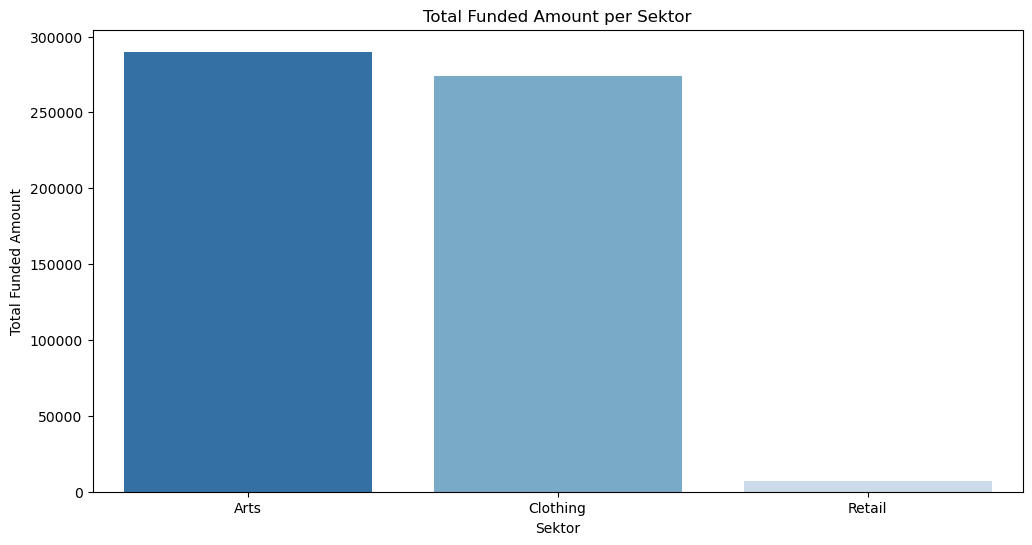

In [27]:
df_sec = df_activity.groupby("sector")["funded_amount"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(df_sec, x='sector', y='funded_amount', estimator=sum, errorbar=None, palette='Blues_r')
plt.xticks(rotation=360)
plt.title("Total Funded Amount per Sektor")
plt.xlabel("Sektor")
plt.ylabel("Total Funded Amount")
plt.show()


Insight:
- Grafik ini memperlihatkan total jumlah pendanaan yang diterima oleh setiap sektor.
- Sektor `Arts` dan `Clothing` mendapatkan pendanaan yang sangat tinggi, hampir setara.
- Sektor `Retail` memiliki pendanaan yang jauh lebih rendah dibandingkan dua sektor lainnya.
- Hal ini dapat menunjukkan bahwa sektor `Arts` dan `Clothing` lebih banyak mendapatkan dukungan atau memiliki lebih banyak pelaku usaha yang mendapatkan pendanaan

In [28]:
# Cek normalitas untuk setiap sector
sectors = df_activity['sector'].unique()
for sector in sectors:
    stat, p_value = shapiro(df_activity[df_activity['sector'] == sector]['funded_amount'])
    print(f'Normalitas {sector}: p-value = {p_value}')

    alpha = 0.05
if p_value > alpha:
    print("Data berdistribusi normal (gagal tolak H0)")
else:
    print("Data tidak berdistribusi normal (tolak H0)")

Normalitas Arts: p-value = 2.994597699467014e-28
Normalitas Clothing: p-value = 1.2844470403824511e-34
Normalitas Retail: p-value = 5.950806274012296e-05
Data tidak berdistribusi normal (tolak H0)


In [29]:
# Jika data tidak normal, gunakan Kruskal-Wallis
stat, p_kruskal = kruskal(
    df_activity[df_activity['sector'] == 'Arts']['funded_amount'],
    df_activity[df_activity['sector'] == 'Clothing']['funded_amount'],
    df_activity[df_activity['sector'] == 'Retail']['funded_amount']
)
print(f'Kruskal-Wallis test: p-value = {p_kruskal}')

alpha = 0.05
if p_value > alpha:
    print('Menolak H0, ada perbedaan signifikan dalam total pendanaan dibebagai sector.')
else:
    print('Gagal menolak H0, tidak ada perbedaan signifikan dalam total pendanaan diberbagai sector.')

Kruskal-Wallis test: p-value = 0.18286397296230297
Gagal menolak H0, tidak ada perbedaan signifikan dalam total pendanaan diberbagai sector.


## **Decision Making**


## 1. Analisis Pola Repayment Interval Berdasarkan Term in Months

- Menentukan apakah repayment interval "bullet" cocok untuk sektor tertentu seperti Weaving dan Clothing.
- Jika mayoritas pinjaman memiliki durasi panjang dengan repayment "bullet", dapat dipertimbangkan model pembayaran lain untuk meningkatkan fleksibilitas pembayaran bagi peminjam.
- Jika sektor tertentu memiliki tren durasi pinjaman yang lebih pendek, dapat direkomendasikan kebijakan yang mendukung pendanaan lebih cepat.

## 2. Analisis Funded Amount dan Loan Amount Berdasarkan Term in Months

- Jika terdapat kesenjangan signifikan antara funded_amount dan loan_amount, dapat dilakukan evaluasi terhadap faktor yang mempengaruhi pendanaan penuh atau sebagian.
- Jika pinjaman jangka panjang lebih sulit didanai, maka bisa dipertimbangkan strategi untuk menarik lender dengan insentif lebih besar.
- Jika pinjaman jangka pendek lebih mudah didanai, bisa dikembangkan strategi pendanaan yang mempercepat siklus kredit bagi peminjam.

## 3. Hubungan Aktivitas dengan Funded Amount

- Jika sektor tertentu mendapatkan pendanaan lebih besar dibanding sektor lain, maka dapat menjadi prioritas dalam kebijakan pinjaman.
- Jika sektor tertentu sulit mendapatkan pendanaan, dapat dieksplorasi pendekatan lain seperti program insentif bagi lender atau restrukturisasi pinjaman untuk meningkatkan daya tariknya.
- Menganalisis apakah jenis aktivitas bisnis tertentu lebih berisiko sehingga membutuhkan perubahan strategi pendanaan.

Keputusan ini dapat membantu optimalisasi kebijakan pinjaman, meningkatkan efisiensi pendanaan, serta memastikan bahwa pinjaman yang diberikan sesuai dengan kebutuhan peminjam dan minat lender.


In [ ]:
df.to_csv('kiva_loan_Exer.csv', index=False)